## Transportation Optimization Problem

Each week, Pfizer vaccines for COVID-19 arrive by air to one of two airports in Toronto: Billy
Bishop Toronto City Airport (100,000 doses) or Toronto Pearson Airport (250,000 doses). They are
immediately transported to 7 hospital immunization clinics and 22 city run mass vaccination sites
where the city can collectively administer exactly 50,000 vaccinations per day (7 days per week).

| Airport                   | Vaccination Sites    | 1-5  | 6-10 | 11-15 | 16-20 | 21-25 | 26-29 |
|---------------------------|----------------------|------|------|-------|-------|-------|-------|
| Billy Bishop Toronto City | Cost per dose ($USD) | 0.05 | 0.06 | 0.07  | 0.08  | 0.09  | 0.10  |
| Toronto Pearson Airport   | Cost per dose ($USD) | 0.08 | 0.05 | 0.09  | 0.10  | 0.07  | 0.06  |

The cost per dose associated with transporting vaccines from each of the airports to each of the
vaccination sites is given in the table. Each day, the seven hospital immunization clinics can administer
four times as many vaccinations as compared to the city-run vaccination clinics. To ensure a feasible
transportation plan, the following restrictions must be adhered to:

1. The difference between the number of doses sent from either airport to sites 1-5 combined must
   be within 4,800 units of each other.
2. The number of doses sent from Toronto Pearson Airport to sites 21-25 combined must be less
   than or equal to eight times of the doses sent from Billy Bishop airport to sites 11-15 combined.
3. The number of doses sent from Billy Bishop airport to sites 26-29 combined must be greater
   than or equal to 80% of the doses sent from Toronto Pearson Airport to sites 16-20 combined.

Formulate and solve a linear program to determine how many doses of vaccine should be sent from
the airports to each of the 29 vaccination locations to minimize transportation costs while adhering
to all constraints.


In [5]:
import gurobipy as gb
from gurobipy import GRB

# Define the transportation cost matrix directly associated with each vaccination site and airport
cost = [
    [0.05, 0.06, 0.07, 0.08, 0.09, 0.10],  # Billy Bishop Toronto City Airport c
    [0.08, 0.05, 0.09, 0.10, 0.07, 0.06]   # Toronto Pearson Airport c
]

airports = 2  # Number of airports
centers = 29  # Number of vaccination centers
days = 7      # Number of days in a week

# Initialize the model
m = gb.Model("vaccine_distribution")

# Add decision variables
x = m.addVars(airports, centers, days, vtype=GRB.INTEGER, name="shipment")

# Objective: Minimize total shipping cost
shipping_cost = gb.quicksum(
    x[a, c, d] * cost[a][c // 5] for a in range(airports) for c in range(centers) for d in range(days)
)
m.setObjective(shipping_cost, GRB.MINIMIZE)

# Constraints for total doses from each airport
m.addConstr(
    gb.quicksum(x[0, c, d] for c in range(centers) for d in range(days)) == 100000 ,
    "TotalDosesBillyBishop"
)
m.addConstr(
    gb.quicksum(x[1, c, d] for c in range(centers) for d in range(days)) == 250000,
    "TotalDosesPearson"
)

# Constraint 1: Difference between doses from airports to sites 1-5 within 4800 units
m.addConstr(
    gb.quicksum(x[0, c, d] for c in range(5) for d in range(days)) - 
    gb.quicksum(x[1, c, d] for c in range(5) for d in range(days)) <= 4800,
    "DifferenceInDosesConstraint1"
)
m.addConstr(
    gb.quicksum(x[1, c, d] for c in range(5) for d in range(days)) - 
    gb.quicksum(x[0, c, d] for c in range(5) for d in range(days)) <= 4800,
    "DifferenceInDosesConstraint2"
)

# Constraint 2: Doses from Pearson to sites 21-25 <= 8 times doses from Billy Bishop to 11-15
m.addConstr(
    gb.quicksum(x[1, c, d] for c in range(20, 25) for d in range(days)) <=
    8 * gb.quicksum(x[0, c, d] for c in range(10, 15) for d in range(days)),
    "RatioConstraintPearsonToBillyBishop"
)

# Constraint 3: Doses from Billy Bishop to 26-29 >= 80% of doses from Pearson to 16-20
m.addConstr(
    gb.quicksum(x[0, c, d] for c in range(25, 29) for d in range(days)) >=
    0.8 * gb.quicksum(x[1, c, d] for c in range(15, 20) for d in range(days)),
    "PercentageConstraintBillyBishopToPearson"
)

# Solve the model
m.optimize()

# Output the solution
if m.status == GRB.OPTIMAL:
    for a in range(airports):
        for c in range(centers):
            for d in range(days):
                if x[a, c, d].X > 0:
                    print(f"Airport {a}, Center {c}, Day {d}: {x[a, c, d].X}")
else:
    print("No optimal solution found.")

Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-20
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22635.2))

CPU model: 12th Gen Intel(R) Core(TM) i7-1260P, instruction set [SSE2|AVX|AVX2]
Thread count: 12 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 6 rows, 406 columns and 679 nonzeros
Model fingerprint: 0x7a8314c8
Variable types: 0 continuous, 406 integer (0 binary)
Coefficient statistics:
  Matrix range     [8e-01, 8e+00]
  Objective range  [5e-02, 1e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+03, 3e+05]
Found heuristic solution: objective 18500.000000
Presolve removed 6 rows and 406 columns
Presolve time: 0.01s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 1 (of 16 available processors)

Solution count 2: 18452 18500 

Optimal solution found (tolerance 1.00e-04)
Best objective

## Investment Portfolio Optimization Problem

The S&P500 is a stock market index of the 500 leading companies publicly traded in the U.S. stock
market. As part of your role at a robo-advisor investment startup, your task is to design an investment
portfolio based on 67 companies listed on the S&P500. The goal is to maximize the expected 1-year
return subject to a total investment of $10 million. The portfolio must satisfy a number of restrictions to
ensure it is sufficiently diversified.

- **Maximum Investment per Stock:** At most, $600,000 can be invested in any individual stock (for diversification purposes).
- **Sector Investment Limits:** 
  - No more than $500,000 can be invested in the Telecommunications sector.
  - The amount invested in the Information Technology (IT) sector must be at least 75% the amount invested in the Telecommunications sector.
- **Sectoral Balance:** The absolute difference between the total invested in the Consumer Discretionary sector and the Consumer Staples sector should not exceed $200,000.
- **Minimum Investments:** At least $1 million must be invested in the Energy sector and at least $300,000 must be invested in companies headquartered in New York, New York.

Formulate and solve a linear program to design an optimal investment portfolio that maximizes the
total expected return and satisfies all restrictions.


In [92]:
import pandas as pd
import gurobipy as gb
from gurobipy import GRB

sp500_data = pd.read_csv('sp500_data.csv')

m = gb.Model('Stock Selection Problem')

x = m.addVars(sp500_data.index, vtype=GRB.CONTINUOUS, name='x', lb=0, ub=600_000)
income = gb.quicksum(x[i] * sp500_data.loc[i, 'PercentReturn'] / 100 for i in sp500_data.index)
m.addConstr(gb.quicksum(x[i] for i in sp500_data.index) == 10_000_000)
m.setObjective(income, GRB.MAXIMIZE)

m.addConstr(gb.quicksum(x[i] for i in sp500_data.index if sp500_data.loc[i, 'GICS Sector'] == 'Telecommunications Services') <= 500_000)

it = sp500_data[sp500_data['GICS Sector'] == 'Information Technology']
m.addConstr(
    gb.quicksum(
        x[i] * it.loc[i, 'Price'] 
        for i in it.index
    ) >= 0.75 * gb.quicksum(
        x[i] 
        for i in sp500_data.index 
        if sp500_data.loc[i, 'GICS Sector'] == 'Telecommunications Services'
    )
)



m.addConstr(
    gb.quicksum(
        x[i] 
        for i in sp500_data.index 
        if sp500_data.loc[i, 'GICS Sector'] == 'Consumer Discretionary'
    ) -
    gb.quicksum(
        x[i] 
        for i in sp500_data.index 
        if sp500_data.loc[i, 'GICS Sector'] == 'Consumer Staples'
    ) <= 200000
)
m.addConstr(
    -gb.quicksum(
        x[i] 
        for i in sp500_data.index 
        if sp500_data.loc[i, 'GICS Sector'] == 'Consumer Discretionary'
    ) +
    gb.quicksum(
        x[i]  
        for i in sp500_data.index 
        if sp500_data.loc[i, 'GICS Sector'] == 'Consumer Staples'
    ) <= 200000
)
m.addConstr(
    gb.quicksum(
        x[i] 
        for i in sp500_data.index 
        if sp500_data.loc[i, 'GICS Sector'] == 'Energy'
    ) >= 1_000_000
)
m.addConstr(
    gb.quicksum(
        x[i] 
        for i in sp500_data.index 
        if sp500_data.loc[i, 'Location of Headquarters'] == 'New York, New York'
    ) >= 300_000
)

m.optimize()

if m.status == GRB.OPTIMAL:
    investments = m.getAttr('x', x)
    total_cost = sum(investments[i]for i in sp500_data.index)
    print(f"Total Cost: ${total_cost:.0f}")
    print("Total Expected Income:", m.ObjVal)
    for i in sp500_data.index:
        if investments[i] > 0:
            print(f"Invest ${investments[i] * sp500_data.loc[i, 'Price']:.0f} in \t\t {sp500_data.loc[i, 'Company']} \t\t\t({sp500_data.loc[i, 'GICS Sector']})")
else:
    print("Optimal solution was not found.")

sp500_data['Investment'] = m.getAttr('x', x)


Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22635.2))

CPU model: 12th Gen Intel(R) Core(TM) i7-1260P, instruction set [SSE2|AVX|AVX2]
Thread count: 12 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 7 rows, 67 columns and 129 nonzeros
Model fingerprint: 0x6093010b
Coefficient statistics:
  Matrix range     [8e-01, 3e+02]
  Objective range  [2e-03, 1e-01]
  Bounds range     [6e+05, 6e+05]
  RHS range        [2e+05, 1e+07]
Presolve removed 1 rows and 16 columns
Presolve time: 0.01s
Presolved: 6 rows, 52 columns, 92 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.9836000e+05   2.487500e+06   0.000000e+00      0s
       6    5.1539448e+05   0.000000e+00   0.000000e+00      0s

Solved in 6 iterations and 0.01 seconds (0.00 work units)
Optimal objective  5.153944765e+05
Total Cost: $10000000
Total Expected Income: 515394.47647951444
Invest $18756000 in 		 Ameren Corp 			(Utilities)
Inve

## Shuttle Service Optimization Problem

York University is planning to introduce a shuttle service between the Keele (U), Markham (f), and
Glendon (a) campuses as well as a few other stops. The shuttle can only travel directly from one
stop to another if there is an arc between them in the network. All connections are two-way streets
and arc labels represent the distance between stops (km).

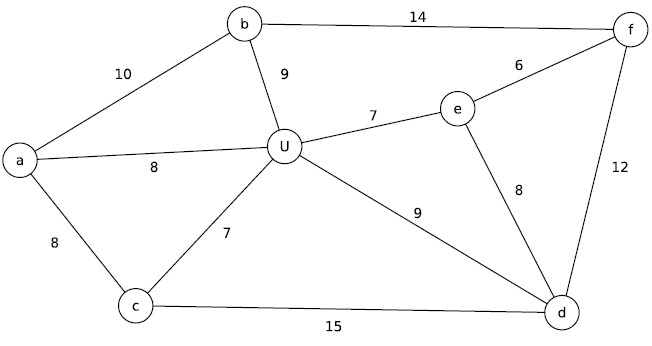

Transportation analysts are considering 58 routes where the shuttle begins at the Keele campus (U),
stops at several locations, and then returns back to the Keele campus (U). The following two factors
must also be considered:

1. If the Glendon campus (a) is visited by more than one shuttle service, where the shuttles are
   serving different routes, an extra $350 per day is incurred.
2. The student association will subsidize the project. They will pay $50 per day for each stop that
   is served by at least three routes (excluding the Keele stop).

Formulate and solve a linear programming model with only binary decision variables to select a
minimum-cost set of routes such that all stops are served by at least one route and the two restrictions
discussed above are adhered to.


In [124]:
import pandas as pd
import gurobipy as gb
from gurobipy import GRB

routes_df = pd.read_csv('routes.csv')

# Initialize the model
m = gb.Model('ShuttleServiceOptimization')

# Define binary decision variables for each route
x = m.addVars(len(routes_df), vtype=GRB.BINARY, name='Route')

# Objective: Minimize the total cost including the maintenance cost and extra c for visiting Glendon campus
maintenance_cost = gb.quicksum(x[i] * routes_df.loc[i, 'Cost'] for i in range(len(routes_df)))
m.setObjective(maintenance_cost, GRB.MINIMIZE)

# Constraint: Ensure all stops are covered at least once
# Extract all unique stops excluding 'U' as it is always included
# Correctly extract all unique stops from the 'Routes' column, excluding 'U'
all_stops = set()
for route in routes_df['Routes']:
    stops_in_route = route.strip("[]").split(", ")
    all_stops.update(stops_in_route)
all_stops.remove('U')  # Remove 'U' as it is the starting and ending point for all routes

#

for stop in all_stops:
    m.addConstr(gb.quicksum(x[i] for i in range(len(routes_df)) if stop in routes_df.loc[i, 'Routes']) >= 1, f"cover_{stop}")

# Extra c for Glendon Campus Visits
# Calculate the number of routes visiting Glendon campus
glendon_visits = gb.quicksum(x[i] for i in range(len(routes_df)) if 'a' in routes_df.loc[i, 'Routes'])
# Calculate extra c for these visits
extra_c = 350 * (glendon_visits * (glendon_visits - 1)) / 2
# Adjust the objective to include these extra c
m.setObjective(maintenance_cost + extra_c, GRB.MINIMIZE)

# Subsidy for Stops Served by At Least Three Routes
# This requires a more complex formulation not directly supported by linear constraints due to the non-linear condition (served by at least three routes)
# One approach to approximate this requirement is to introduce constraints and variables to model the subsidy indirectly,
# but accurately capturing this requirement might necessitate a mixed-integer programming model with additional binary variables and constraints

# Optimize the model
m.optimize()

# Output the selected routes
if m.status == GRB.OPTIMAL:
    selected_routes = [i for i in range(len(routes_df)) if x[i].X > 0.5]
    print("Selected Routes:")
    for i in selected_routes:
        print(f"Route {i+1}: {routes_df.loc[i, 'Routes']} with cost {routes_df.loc[i, 'Cost']}")
else:
    print("Optimal solution not found.")

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22635.2))

CPU model: 12th Gen Intel(R) Core(TM) i7-1260P, instruction set [SSE2|AVX|AVX2]
Thread count: 12 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 6 rows, 58 columns and 262 nonzeros
Model fingerprint: 0x3636f4cc
Model has 820 quadratic objective terms
Variable types: 0 continuous, 58 integer (58 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e+01, 1e+02]
  QObjective range [4e+02, 7e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 279200.00000
Presolve removed 0 rows and 10 columns
Presolve time: 0.00s
Presolved: 6 rows, 48 columns, 225 nonzeros
Presolved model has 820 quadratic objective terms
Found heuristic solution: objective 278280.00000
Variable types: 0 continuous, 48 integer (48 binary)
Found heuristic solution: objective 134.0000000

Root relaxation: objective 

### OMIS6000 – Winter 2024 Midterm Practice Questions Page 1 of 3


The city of Moosonee, Ontario is soliciting bids from 4 companies (A, B, C, and D) for 6 potential bus routes that support the surrounding communities. Each company submits a set of bids which reflect the cost of providing service to a route for a single year. That is, let 𝐶𝑖𝑗 represent the cost that company 𝑖 says it will charge to provide service to route 𝑗. After all bids are submitted, city council must make two decisions: it must decide whether to open a route, and if so, which company should be assigned to service it. They also have restrictions:

1. Only one company can be assigned to a route if it is opened.
2. Each company can be assigned to at most two bus routes.
3. At least three bus routes must be opened.
4. Route 2 and 5 must both be opened or not at all.
5. Either route 3 must be opened or route 4 must be opened but not both.
6. If company B is assigned to route 1, it cannot also provide service to route 4.
7. If company A is assigned to route 3, it must also be assigned to route 5.
8. Company D must be assigned to at least one route.

The council’s objective is to minimize the total cost of providing service to all opened routes. Formulate a binary program to determine which routes to open and the optimal assignment of companies to routes.

In [16]:
import gurobipy as gb
from gurobipy import GRB

# Given data
companies = 4  # Companies A, B, C, D
routes = 6
c = [
    [60, 40, 10, 20, 50, 30],  # Company A
    [60, 70, 20, 50, 30, 40],  # Company B
    [30, 50, 70, 60, 40, 80],  # Company C
    [70, 90, 40, 60, 50, 80]   # Company D
]

# Model
m = gb.Model('min_cost')

# Decision Variables
x = m.addVars(companies, routes, vtype=GRB.BINARY, name='x')
y = m.addVars(routes, vtype=GRB.BINARY, name='y')

# Objective: Minimize the total cost
m.setObjective(gb.quicksum(c[i][j]*x[i,j] for i in range(companies) for j in range(routes)), GRB.MINIMIZE)

# Constraints
# Each route is assigned to only one company if opened
for j in range(routes):
    m.addConstr(sum(x[i,j] for i in range(companies)) == y[j], name=f"route_{j+1}_assignment")

# Each company can be assigned to at most two routes
for i in range(companies):
    m.addConstr(sum(x[i,j] for j in range(routes)) <= 2, name=f"company_{i+1}_max_routes")

# At least three routes must be opened
m.addConstr(sum(y[j] for j in range(routes)) >= 3, name="min_routes")

# Routes 2 and 5 must both be opened or not at all
m.addConstr(y[1] == y[4], name="route_2_5_constraint")

# Either route 3 must be opened, or route 4 must be opened, but not both
m.addConstr(y[2] + y[3] == 1, name="route_3_4_constraint")

# If company B (1) is assigned to route 1, it cannot also provide service to route 4
m.addConstr(x[1,0] + x[1,3] <= 1, name="company_B_route_1_4_constraint")

# If company A (0) is assigned to route 3, it must also be assigned to route 5
m.addConstr(x[0,2] <= x[0,4], name="company_A_route_3_5_constraint")

# Company D (3) must be assigned to at least one route
m.addConstr(sum(x[3,j] for j in range(routes)) >= 1, name="company_D_at_least_one_route")

# Solve
m.optimize()

# Display results
if m.status == GRB.OPTIMAL:
    print("Optimal solution found: {m.ObjVal:.0f}")

    for j in range(routes):
        if y[j].X > 0.5:
            print(f"Route {j+1} is opened with company assigned:", end=" ")
            for i in range(companies):
                if x[i,j].X > 0.5:
                    print(chr(65+i))  # Converts 0 to 'A', 1 to 'B', etc.
else:
    print("Optimal solution was not found.")

#print all constraintsm.optimize()

for var in m.getVars():
    if var.X ==1:
        print(f"{var.VarName}: {var.X}, Obj: {var.Obj}")

for constr in m.getConstrs():
    # Safely access attributes post optimization
    print(f"Constraint: {constr.ConstrName}, RHS: {constr.RHS}, Sense: {constr.Sense}, Slack: {constr.getAttr('Slack')}")


Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22635.2))

CPU model: 12th Gen Intel(R) Core(TM) i7-1260P, instruction set [SSE2|AVX|AVX2]
Thread count: 12 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 16 rows, 30 columns and 74 nonzeros
Model fingerprint: 0x1fcb96cb
Variable types: 0 continuous, 30 integer (30 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 9e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+00]
Found heuristic solution: objective 230.0000000
Presolve removed 4 rows and 6 columns
Presolve time: 0.00s
Presolved: 12 rows, 24 columns, 56 nonzeros
Found heuristic solution: objective 110.0000000
Variable types: 0 continuous, 24 integer (24 binary)

Root relaxation: objective 1.000000e+02, 8 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumb

# OMIS6000 – Winter 2024 Midterm Practice Questions

McKenna Logistics, a logistics company based in Toronto, has recently secured a contract to transport septic products from its warehouse to wholesalers across Ontario. The products are shipped in three types of pallets: heavy, medium, and light. Each day, the warehouse needs to ship 7 heavy pallets (4 tons each), 6 medium pallets (3 tons each), and 5 light pallets (0.5 tons each).

McKenna Logistics has three types of trucks available for transportation:
- Truck 1: 13.5-ton weight limit, $5,500 per trip
- Truck 2: 12-ton weight limit, $4,700 per trip
- Truck 3: 10-ton weight limit, $3,900 per trip

Each truck can only complete one trip per day, and the company can assign at most three trucks of each type to the septic business, ensuring that at least one type of each truck is used.


In [81]:
from gurobipy import Model, GRB

# Create a new model
m = Model("McKennaLogistics")

# Constants
heavy_pallet_weight = 4
medium_pallet_weight = 3
light_pallet_weight = 0.5
trucks_costs = [5500, 5500, 5500, 4700, 4700, 4700, 3900, 3900, 3900]
trucks_limits = [13.5, 13.5, 13.5, 12, 12, 12, 10, 10, 10]
num_heavy = 7
num_medium = 6
num_light = 5
num_trucks = 9

# Decision variables
x = m.addVars(num_heavy, num_trucks, vtype=GRB.BINARY, name="x")
y = m.addVars(num_medium, num_trucks, vtype=GRB.BINARY, name="y")
z = m.addVars(num_light, num_trucks, vtype=GRB.BINARY, name="z")
v = m.addVars(num_trucks, vtype=GRB.BINARY, name="v")

# Objective: Minimize the total cost of using trucks
m.setObjective(sum(trucks_costs[j]*v[j] for j in range(num_trucks)), GRB.MINIMIZE)

# Constraints
# Ensure at least one truck of each type is used
m.addConstrs((sum(v[j] for j in range(0, 3)) >= 1 for _ in range(num_heavy)), name="AtLeastOneType1")
m.addConstrs((sum(v[j] for j in range(3, 6)) >= 1 for _ in range(num_medium)), name="AtLeastOneType2")
m.addConstrs((sum(v[j] for j in range(6, 9)) >= 1 for _ in range(num_light)), name="AtLeastOneType3")

# Weight limit constraints for each truck
for j in range(num_trucks):
    m.addConstr(sum(heavy_pallet_weight * x[i, j] for i in range(num_heavy)) +
                sum(medium_pallet_weight * y[i, j] for i in range(num_medium)) +
                sum(light_pallet_weight * z[i, j] for i in range(num_light)) <= trucks_limits[j] * v[j], f"WeightLimit{j+1}")

# Each pallet is assigned to exactly one truck
m.addConstrs((sum(x[i, j] for j in range(num_trucks)) == 1 for i in range(num_heavy)), name="AssignHeavy")
m.addConstrs((sum(y[i, j] for j in range(num_trucks)) == 1 for i in range(num_medium)), name="AssignMedium")
m.addConstrs((sum(z[i, j] for j in range(num_trucks)) == 1 for i in range(num_light)), name="AssignLight")
m.addConstr(v[3]>=v[2])
# Solve
m.optimize()

# Print solution
if m.status == GRB.OPTIMAL:
    print(f"Optimal Solution: {m.objVal}")
    for j in range(num_trucks):
        if v[j].x > 0.5:  # If a truck is used
            print(f"Truck {j+1} is used.")
else:
    print("No optimal solution found.")


Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22635.2))

CPU model: 12th Gen Intel(R) Core(TM) i7-1260P, instruction set [SSE2|AVX|AVX2]
Thread count: 12 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 46 rows, 171 columns and 389 nonzeros
Model fingerprint: 0x481f27a2
Variable types: 0 continuous, 171 integer (171 binary)
Coefficient statistics:
  Matrix range     [5e-01, 1e+01]
  Objective range  [4e+03, 6e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 42300.000000
Presolve removed 15 rows and 0 columns
Presolve time: 0.00s
Presolved: 31 rows, 171 columns, 344 nonzeros
Variable types: 0 continuous, 171 integer (171 binary)

Root relaxation: objective 1.917000e+04, 48 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

 

Suppose that the network below shows the locations of the 7 bike hubs in the program. The edges/arcs of the network indicate the cost and direction of moving one bike between hubs. The writing next to the nodes show typical hub-bike imbalances after the rush hour period. A positive number indicates an excess supply of bikes and a negative number indicates an excess demand of bikes at a hub. These values are expressed as a percentage of the total demand predicted by the forecasting model (assume the model predicts 1400 bikes). Formulate a linear program to redistribute the bikes at the end of rush hour. More specifically, create a linear programming model to determine what hubs the bikes should be coming from and what hubs the bikes should be going to in order to minimize the cost of redistribution given that the following restrictions must be adhered to:

The total number of bikes transferred from hubs 2 and 3 to any other hub must not exceed twice the number of bikes transferred from hubs 4 and 5 to any other hub.
The number of bikes transferred between hubs 1-5 must be between 5% and 50% of predicted demand.
Comment on how the data and/or forecasting model can be improved to better support the inputs to this model?

Hint: For simplicity, define the set of parameters 𝑐𝑖𝑗 to be the cost of moving a single bike from hub 𝑖 to hub 𝑗. Let 𝑫 be total mean demand as predicted by our forecasting model in Question 1 and 𝒒𝒊𝑫 be the excess/deficit at hub location 𝒊. Let 𝒙𝒊𝒋 be the number of bikes moved from hub 𝒊 to hub 𝒋.

In [84]:
from gurobipy import Model, GRB

# Initialize the model
m = Model("BikeRedistribution")

# Parameters
total_demand_D = 1400  # total mean demand
q = [0.05 * total_demand_D, 0.3 * total_demand_D, 0.03 * total_demand_D, -0.03 * total_demand_D, 0.02 * total_demand_D, -0.05 * total_demand_D, 0.06 * total_demand_D]  # hub-bike imbalances
costs = {
    (1, 2): 20, (1, 3): 25, (1, 5): 20,
    (2, 5): 30, (2, 7): 30,
    (3, 1): 25, (3, 6): 35,
    (4, 2): 45, (4, 5): 15, (4, 7): 27,
    (5, 3): 28, (5, 4): 15, (5, 6): 28,
    (6, 7): 12,
    (7, 4): 12
}

# Decision variables
x = m.addVars(costs.keys(), lb=0, vtype=GRB.INTEGER, name="x")

# Objective: Minimize the total cost of redistribution
m.setObjective(sum(costs[i, j] * x[i, j] for i, j in costs), GRB.MINIMIZE)

# Constraints
m.addConstrs((x.sum(i, '*') - x.sum('*', i) == q[i-1] for i in range(1, 8)), name="hub_balance")
m.addConstr(x[2, 5] + x[2, 7] + x[3, 1] + x[3, 6] <= 2 * (x[5, 3] + x[5, 4] + x[5, 6] + x[4, 2]), name="transfer_restriction")
m.addConstrs((x.sum('*', i) + x.sum(i, '*') >= 0.05 * total_demand_D for i in range(1, 6)), name="min_transfer")
m.addConstrs((x.sum('*', i) + x.sum(i, '*') <= 0.5 * total_demand_D for i in range(1, 6)), name="max_transfer")

# Solve
m.optimize()

# Print solution
if m.status == GRB.OPTIMAL:
    print(f"Optimal Solution: {m.objVal}")
    for i, j in costs:
        if x[i, j].x > 0:
            print(f"{int(x[i, j].x)} bikes move from hub {i} to hub {j}")
else:
    print("No optimal solution found.")


Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22635.2))

CPU model: 12th Gen Intel(R) Core(TM) i7-1260P, instruction set [SSE2|AVX|AVX2]
Thread count: 12 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 18 rows, 15 columns and 84 nonzeros
Model fingerprint: 0x042c8ed6
Variable types: 0 continuous, 15 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [1e+01, 5e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+01, 7e+02]
Presolve removed 6 rows and 2 columns
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 16 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
No optimal solution found.
